In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/DataForHists/kaon_pn_4GeV_May7_ntuple/*.root")

In [3]:
hists = {}
hists["Target_kaone_hist"] = hist.Hist("Target SP Kaons",
                                hist.Cat("Ktype", "Type of Kaons"),      
                                hist.Bin("k", r"Kinetic and $e^-$ Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )

In [4]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon = ldmx_events['Target_Kaon']
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    def flat(x,axis=None):
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x
    
    for part,pmask in masks_id.items():
        part_mask = (abs(target_kaon.pdgID) == pmask)
        hists["Target_kaone_hist"].fill(Ktype= part,
                                     k= flat(target_kaon[part_mask].e) - masses[part],
                                     e= flat(target_kaon[part_mask].electron_e),
                                     )
    print(part_mask)

In [5]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    nchunk += 1
    print('process')
    ProcessChunk(chunk, hists)

process
[[False, False], [False], [False], [True, ... [False, True], [False, False], [False]]
process
[[False], [True, True], [False, True], ... [True], [False, False], [False]]
process
[[False, False], [False], [True], [True, ... False, True], [False], [True], [False]]
process
[[False], [True, True], [True], [True, ... False], [False, False], [True], [True]]
process
[[False], [False, False], [False], [False], ... True], [False], [True], [True, True]]
process
[[False], [True, True], [True, True], ... False], [False], [True, False], [True]]
process
[[False, False], [False], [False], [True, ... [True], [False, False], [False, False]]
process
[[True], [True], [True], [False], ... [False, True], [False, True], [False]]
process
[[False], [True, False], [False, True], [False, ... [False], [True], [True], [False]]
process
[[True], [True], [False], [False, False, ... [True], [True, True], [False, False]]
process
[[True], [False], [False], [False, False, ... [True, True], [False], [False, False

<Hist (Ktype,k,e) instance at 0x12e3096d0>


Text(0.5, 1.0, '$K_s$')

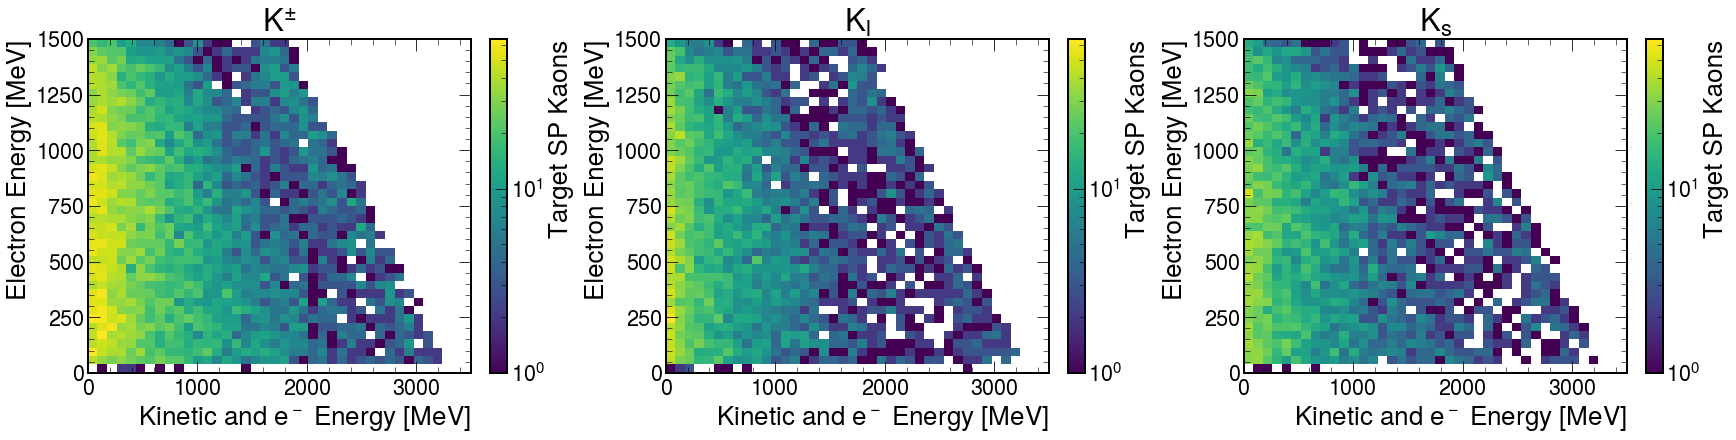

In [6]:
print(hists["Target_kaone_hist"])
fig, ax = plt.subplots(1,3, figsize=(24,6), constrained_layout=True)
hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype',['Kpm']), xaxis='k', ax=ax[0],patch_opts=POPTS);
ax[0].set_title("$K^{\pm}$")

hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype', ['Klong']), xaxis='k', ax=ax[1],patch_opts=POPTS);
ax[1].set_title("$K_l$")

hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype', ['Kshort']), xaxis='k', ax=ax[2],patch_opts=POPTS);
ax[2].set_title("$K_s$")

#hist.plot1d(hists["Target_e_hist"],ax=ax,clear=False);
#hist.plot1d(hists["Target_kaon_hist"],ax=ax,clear=False);
#leg = ax.legend([r'$K_l$',r'$K^{\pm}$',r'$K_s$', r'$e^-$'])

#ex:
#hist.plot2d(hists["Target_kaon_ke"].integrate('Ktype'), xaxis='k', ax=ax,patch_opts=POPTS);

